In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score

In [ ]:
sp500 = yf.Ticker("^GSPC")

In [ ]:
sp500 = sp500.history(period = "max")

In [ ]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-04-25 00:00:00-04:00,4126.430176,4126.430176,4071.379883,4071.629883,3978640000,0.0,0.0
2023-04-26 00:00:00-04:00,4087.780029,4089.669922,4049.350098,4055.989990,3837030000,0.0,0.0
2023-04-27 00:00:00-04:00,4075.290039,4138.240234,4075.290039,4135.350098,3750550000,0.0,0.0


<Axes: xlabel='Date'>

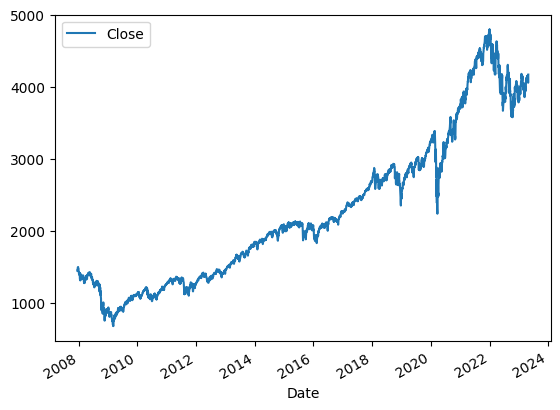

In [ ]:
sp500.plot.line(y="Close",  use_index = True)

In [ ]:
del sp500["Dividends"]
del sp500["Stock Splits"]

In [ ]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2023-04-25 00:00:00-04:00,4126.430176,4126.430176,4071.379883,4071.629883,3978640000,4055.989990
2023-04-26 00:00:00-04:00,4087.780029,4089.669922,4049.350098,4055.989990,3837030000,4135.350098
2023-04-27 00:00:00-04:00,4075.290039,4138.240234,4075.290039,4135.350098,3750550000,4169.479980


In [ ]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2023-04-25 00:00:00-04:00,4126.430176,4126.430176,4071.379883,4071.629883,3978640000,4055.989990,0
2023-04-26 00:00:00-04:00,4087.780029,4089.669922,4049.350098,4055.989990,3837030000,4135.350098,1
2023-04-27 00:00:00-04:00,4075.290039,4138.240234,4075.290039,4135.350098,3750550000,4169.479980,1


In [ ]:
sp500 = sp500.loc["2000-01-01":].copy()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2000-01-03 00:00:00-05:00,1469.250000,1478.000000,1438.359985,1455.219971,931800000,1399.420044,0
2000-01-04 00:00:00-05:00,1455.219971,1455.219971,1397.430054,1399.420044,1009000000,1402.109985,1
2000-01-05 00:00:00-05:00,1399.420044,1413.270020,1377.680054,1402.109985,1085500000,1403.449951,1
2000-01-06 00:00:00-05:00,1402.109985,1411.900024,1392.099976,1403.449951,1092300000,1441.469971,1
2000-01-07 00:00:00-05:00,1403.449951,1441.469971,1400.729980,1441.469971,1225200000,1457.599976,1
...,...,...,...,...,...,...,...
2023-04-25 00:00:00-04:00,4126.430176,4126.430176,4071.379883,4071.629883,3978640000,4055.989990,0
2023-04-26 00:00:00-04:00,4087.780029,4089.669922,4049.350098,4055.989990,3837030000,4135.350098,1
2023-04-27 00:00:00-04:00,4075.290039,4138.240234,4075.290039,4135.350098,3750550000,4169.479980,1


RANDOM FOREST MODEL

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)
train_sp500 = sp500.iloc[:-100]
test_sp500 = sp500.iloc[-100:]

predict_sp500 = ["Close","Volume","Open","High","Low"]
model.fit(train_sp500[predict_sp500], train_sp500["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

NameError: ignored

In [ ]:
predict = model.predict(test_sp500[predict_sp500])
predict = pd.Series(predict, index = test_sp500.index)
predict

Date
2022-12-05 00:00:00-05:00    0
2022-12-06 00:00:00-05:00    1
2022-12-07 00:00:00-05:00    0
2022-12-08 00:00:00-05:00    0
2022-12-09 00:00:00-05:00    0
                            ..
2023-04-24 00:00:00-04:00    0
2023-04-25 00:00:00-04:00    1
2023-04-26 00:00:00-04:00    0
2023-04-27 00:00:00-04:00    0
2023-04-28 00:00:00-04:00    0
Length: 100, dtype: int64

In [ ]:
precision_score(test_sp500["Target"], predict)

0.4857142857142857

<Axes: xlabel='Date'>

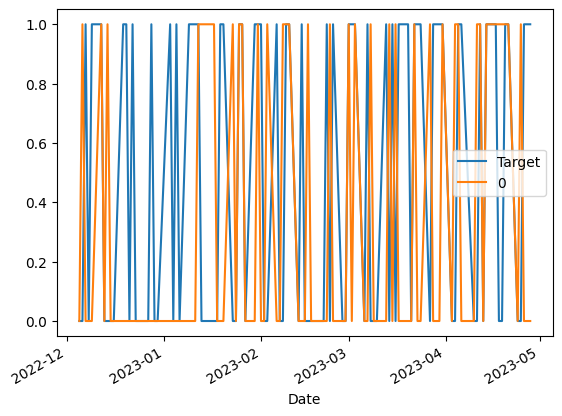

In [ ]:
plot_train01 = pd.concat([test_sp500["Target"], predict], axis = 1)
plot_train01.plot()

In [ ]:
def prediction(train_sp500, test_sp500, predict_sp500, model):
  model.fit(train_sp500[predict_sp500], train_sp500["Target"])
  pred = model.predict(test_sp500[predict_sp500])
  pred = pd.Series(pred, index = test_sp500.index , name = "Predictions")
  plot_train01 = pd.concat([test_sp500["Target"], pred], axis = 1)
  return plot_train01

In [ ]:
from sklearn.model_selection import train_test_split
def backtest(data, model, predict_sp500, start = 2500, step=250):
  all_predictions=[]
  for i in range(start, data.shape[0], step):
    train = data.iloc[0:i].copy()
    test = data.iloc[i:(i+step)].copy()
    predictions = prediction(train_sp500, test_sp500, predict_sp500, model)
    all_predictions.append(predictions)
  return pd.concat(all_predictions)

In [ ]:
predictions = backtest(sp500, model, predict_sp500)

In [ ]:
predictions["Predictions"].value_counts()

0    650
1    350
Name: Predictions, dtype: int64

In [ ]:
precision_score(predictions["Target"], predictions["Predictions"])

0.4857142857142857

In [ ]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.51
0    0.49
Name: Target, dtype: float64

In [ ]:
horizons = [2,5,60,250,1000]
new_predictors = []
for horizon in horizons:
  rolling_averages = sp500.rolling(horizon).mean()
  ratio_column = f"Close_Ratio_{horizon}"
  sp500[ratio_column] = sp500["Close"]/rolling_averages["Close"]
  trend_column = f"Trend_{horizon}"
  sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
  new_predictors += [ratio_column, trend_column]

<ipython-input-54-5b51ca32ce9c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500[ratio_column] = sp500["Close"]/rolling_averages["Close"]
<ipython-input-54-5b51ca32ce9c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]


In [ ]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
2003-12-26 00:00:00-05:00,1094.040039,1098.469971,1094.040039,1095.890015,356070000,1109.479980,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-12-29 00:00:00-05:00,1095.890015,1109.479980,1095.890015,1109.479980,1058800000,1109.640015,1,1.006162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-12-30 00:00:00-05:00,1109.479980,1109.750000,1106.410034,1109.640015,1012600000,1111.920044,1,1.000072,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-12-31 00:00:00-05:00,1109.640015,1112.560059,1106.209961,1111.920044,1027500000,1108.479980,0,1.001026,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-02 00:00:00-05:00,1111.920044,1118.849976,1105.079956,1108.479980,1153200000,1122.219971,1,0.998451,1.0,1.001263,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-24 00:00:00-04:00,4132.069824,4142.410156,4117.770020,4137.040039,3290940000,4071.629883,0,1.000426,2.0,0.998815,3.0,1.022201,32.0,1.043863,116.0,1.109711,533.0
2023-04-25 00:00:00-04:00,4126.430176,4126.430176,4071.379883,4071.629883,3978640000,4055.989990,0,0.992032,1.0,0.986990,2.0,1.006035,31.0,1.027466,116.0,1.091831,533.0
2023-04-26 00:00:00-04:00,4087.780029,4089.669922,4049.350098,4055.989990,3837030000,4135.350098,1,0.998076,0.0,0.987918,2.0,1.002013,31.0,1.023652,115.0,1.087296,533.0


In [ ]:
sp500 = sp500.dropna()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
2007-12-17 00:00:00-05:00,1465.050049,1465.050049,1445.430054,1445.900024,3569030000,1454.979980,1,0.992433,0.0,0.981402,2.0,0.963116,28.0,0.979957,134.0,1.130576,556.0
2007-12-18 00:00:00-05:00,1445.920044,1460.160034,1435.650024,1454.979980,3723690000,1453.000000,0,1.003130,1.0,0.990614,3.0,0.969839,29.0,0.986032,134.0,1.137368,556.0
2007-12-19 00:00:00-05:00,1454.699951,1464.420044,1445.310059,1453.000000,3401300000,1460.119995,1,0.999319,1.0,0.993811,2.0,0.969211,29.0,0.984611,134.0,1.135516,555.0
2007-12-20 00:00:00-05:00,1456.420044,1461.530029,1447.219971,1460.119995,3526890000,1484.459961,1,1.002444,1.0,1.002561,2.0,0.974668,29.0,0.989324,135.0,1.140770,555.0
2007-12-21 00:00:00-05:00,1463.189941,1485.400024,1463.189941,1484.459961,4508590000,1496.449951,1,1.008266,2.0,1.016968,3.0,0.991433,29.0,1.005615,136.0,1.159446,556.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-24 00:00:00-04:00,4132.069824,4142.410156,4117.770020,4137.040039,3290940000,4071.629883,0,1.000426,2.0,0.998815,3.0,1.022201,32.0,1.043863,116.0,1.109711,533.0
2023-04-25 00:00:00-04:00,4126.430176,4126.430176,4071.379883,4071.629883,3978640000,4055.989990,0,0.992032,1.0,0.986990,2.0,1.006035,31.0,1.027466,116.0,1.091831,533.0
2023-04-26 00:00:00-04:00,4087.780029,4089.669922,4049.350098,4055.989990,3837030000,4135.350098,1,0.998076,0.0,0.987918,2.0,1.002013,31.0,1.023652,115.0,1.087296,533.0


In [ ]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [ ]:
def prediction(train_sp500, test_sp500, predict_sp500, model):
  model.fit(train_sp500[predict_sp500], train_sp500["Target"])
  predict = model.predict_proba(test_sp500[predict_sp500])[:,1]
  predict[predict >= .6] = 1
  predict[predict < .6] = 0
  predict = pd.Series(predict, index = test_sp500.index , name = "Predictions")
  plot_train01 = pd.concat([test_sp500["Target"], predict], axis = 1)
  return plot_train01

In [ ]:
predictions = backtest(sp500, model, new_predictors)

In [ ]:
predictions["Predictions"].value_counts()

0.0    540
1.0     60
Name: Predictions, dtype: int64

In [ ]:
precision_score(predictions["Target"], predictions["Predictions"])

0.8

In [ ]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.51
0    0.49
Name: Target, dtype: float64

In [ ]:
predictions

,Target,Predictions
Date,,
2022-12-05 00:00:00-05:00,0,0.0
2022-12-06 00:00:00-05:00,0,0.0
2022-12-07 00:00:00-05:00,1,1.0
2022-12-08 00:00:00-05:00,0,0.0
2022-12-09 00:00:00-05:00,1,1.0
...,...,...
2023-04-24 00:00:00-04:00,0,0.0
2023-04-25 00:00:00-04:00,0,0.0
2023-04-26 00:00:00-04:00,1,1.0


LINEAR REGRESSION MODEL

In [ ]:
from sklearn.linear_model import LinearRegression
model_linearR = LinearRegression()
train_sp500_L = sp500.iloc[:-100]
test_sp500_L = sp500.iloc[-100:]

predict_sp500_L = ["Close","Volume","Open","High","Low"]
model_linearR.fit(train_sp500_L[predict_sp500_L], train_sp500_L["Target"])
predict_L = model_linearR.predict(test_sp500_L[predict_sp500_L])
predict_L = pd.Series(predict_L, index = test_sp500_L.index)
predict_L


Date
2022-12-05 00:00:00-05:00    0.558206
2022-12-06 00:00:00-05:00    0.548982
2022-12-07 00:00:00-05:00    0.539631
2022-12-08 00:00:00-05:00    0.516246
2022-12-09 00:00:00-05:00    0.557521
                               ...   
2023-04-24 00:00:00-04:00    0.531500
2023-04-25 00:00:00-04:00    0.574082
2023-04-26 00:00:00-04:00    0.559137
2023-04-27 00:00:00-04:00    0.459484
2023-04-28 00:00:00-04:00    0.489408
Length: 100, dtype: float64

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
r2_score(test_sp500_L["Target"], predict_L)
mean_absolute_error(test_sp500_L["Target"], predict_L)

0.502014494042996

DECISION TREE MODEL

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_Decision = DecisionTreeClassifier(max_depth=3)
train_sp500_D = sp500.iloc[:-100]
test_sp500_D = sp500.iloc[-100:]

predict_sp500_D = ["Close","Volume","Open","High","Low"]
model_Decision.fit(train_sp500_D[predict_sp500_D], train_sp500_D["Target"])
predict_D = model_Decision.predict(test_sp500_D[predict_sp500_D])
predict_D = pd.Series(predict_D, index = test_sp500_D.index)
predict_D

Date
2022-12-05 00:00:00-05:00    0
2022-12-06 00:00:00-05:00    0
2022-12-07 00:00:00-05:00    0
2022-12-08 00:00:00-05:00    0
2022-12-09 00:00:00-05:00    0
                            ..
2023-04-24 00:00:00-04:00    0
2023-04-25 00:00:00-04:00    0
2023-04-26 00:00:00-04:00    0
2023-04-27 00:00:00-04:00    0
2023-04-28 00:00:00-04:00    0
Length: 100, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(test_sp500_D["Target"], predict_D)

0.49